# Working with Data - Computer Lab for Guest Lecture Julia Lane

In this computer lab we will learn more more details and practice data work to enhance the content of the lecture presented by Julia Lane on responsible data use. We will address a research question, think about data and measurement errors, and manipulate data. 

OUTLINE: 
1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset. 

In [1]:
import os
import pandas as pd
import numpy as np
import re
PUIdata = os.getenv('PUIDATA')

In [2]:
# Load dataset
data = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9') 
#311_Service_Requests_from_2010_to_Present.csv
data.head(3)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,17,39,40,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,11224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.573431,-73.991742,"(40.57343122248129, -73.99174247588253)"
1,31908754,11/05/2015 02:09:49 AM,NaN,CHALL,CHALL,Opinion for the Mayor,HOUSING,NaN,NaN,NaN,...,NaN,NaN,NaN,1-1-1173130914,NaN,NaN,NaN,NaN,NaN,NaN
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11234,1157 EAST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.625004,-73.920726,"(40.62500363580505, -73.92072558378698)"


In [3]:
data = data[['Unique Key','Created Date','Agency Name','Complaint Type','Descriptor','Community Board','Borough']]

# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc. 

In [4]:
x =list(data.columns)
x

['Unique Key',
 'Created Date',
 'Agency Name',
 'Complaint Type',
 'Descriptor',
 'Community Board',
 'Borough']

In [5]:
# Check if all Boroughs and Community Districts are represented in the Data 
borough = data['Borough'].unique()
borough

array(['BROOKLYN', 'Unspecified', 'STATEN ISLAND', 'MANHATTAN', 'BRONX',
       'QUEENS'], dtype=object)

In [6]:
len(borough) #should be 5

6

In [7]:
communityB = data['Community Board'].unique()
type(communityB)#.sort_values

numpy.ndarray

In [8]:
len(communityB) #we should have 59

77

Manhattan	
1 2 3 4 5 6 7 8 9 10 11 12
The Bronx	
1 2 3 4 5 6 7 8 9 10 11 12
Brooklyn	
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18
Queens	
1 2 3 4 5 6 7 8 9 10 11 12 13 14
Staten Island	
1 2 3

In [9]:
np.sort(communityB)

array(['0 Unspecified', '01 BRONX', '01 BROOKLYN', '01 MANHATTAN',
       '01 QUEENS', '01 STATEN ISLAND', '02 BRONX', '02 BROOKLYN',
       '02 MANHATTAN', '02 QUEENS', '02 STATEN ISLAND', '03 BRONX',
       '03 BROOKLYN', '03 MANHATTAN', '03 QUEENS', '03 STATEN ISLAND',
       '04 BRONX', '04 BROOKLYN', '04 MANHATTAN', '04 QUEENS', '05 BRONX',
       '05 BROOKLYN', '05 MANHATTAN', '05 QUEENS', '06 BRONX',
       '06 BROOKLYN', '06 MANHATTAN', '06 QUEENS', '07 BRONX',
       '07 BROOKLYN', '07 MANHATTAN', '07 QUEENS', '08 BRONX',
       '08 BROOKLYN', '08 MANHATTAN', '08 QUEENS', '09 BRONX',
       '09 BROOKLYN', '09 MANHATTAN', '09 QUEENS', '10 BRONX',
       '10 BROOKLYN', '10 MANHATTAN', '10 QUEENS', '11 BRONX',
       '11 BROOKLYN', '11 MANHATTAN', '11 QUEENS', '12 BRONX',
       '12 BROOKLYN', '12 MANHATTAN', '12 QUEENS', '13 BROOKLYN',
       '13 QUEENS', '14 BROOKLYN', '14 QUEENS', '15 BROOKLYN',
       '16 BROOKLYN', '17 BROOKLYN', '18 BROOKLYN', '26 BRONX', '27 BRONX',
      

In [10]:
# How many unique values do we have? 
len(data)

10187766

In [11]:
# Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
# We should have 59 Community Districts.

In [12]:
# Check for duplicates? Are these plausible?
data.drop_duplicates(inplace=True)
len(data)

10187744

In [13]:
# What about missing values? Can you detect any patterns? 
len(pd.isnull(data == True))

10187744

In [14]:
data.head(5)

,Unique Key,Created Date,Agency Name,Complaint Type,Descriptor,Community Board,Borough
0,31911011,11/05/2015 02:59:15 AM,Department of Transportation,Street Condition,Pothole,13 BROOKLYN,BROOKLYN
1,31908754,11/05/2015 02:09:49 AM,CHALL,Opinion for the Mayor,HOUSING,0 Unspecified,Unspecified
2,31910423,11/05/2015 02:06:51 AM,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,18 BROOKLYN,BROOKLYN
3,31909924,11/05/2015 02:02:20 AM,New York City Police Department,Illegal Parking,Blocked Hydrant,12 BROOKLYN,BROOKLYN
4,31913310,11/05/2015 01:57:20 AM,HRA Benefit Card Replacement,Benefit Card Replacement,Medicaid,0 Unspecified,Unspecified


In [15]:
# Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
# to fill missings in Resolution Descriptor?

In [16]:
# Generate marker for unplausible Community Districts
# How do these districts look like? 

In [17]:
# Drop the marked districts

datacount = data.groupby(by='Community Board').count()

In [18]:
datac = pd.DataFrame(datacount['Created Date'])
datac.reset_index(inplace=True)
datac.columns = ['Community Board', 'Complaints Count']
datac.head(10)
datac = datac[datac['Community Board'] != '0 Unspecified']
datac = datac[datac['Community Board'] != 'Unspecified BRONX']
datac = datac[datac['Community Board'] != 'Unspecified BROOKLYN']
datac = datac[datac['Community Board'] != 'Unspecified MANHATTAN']
datac = datac[datac['Community Board'] != 'Unspecified QUEENS']
datac = datac[datac['Community Board'] != 'Unspecified STATEN ISLAND']

datac = datac[datac['Community Board'] != '18 BROOKLYN']
datac = datac[datac['Community Board'] != '26 BRONX']
datac = datac[datac['Community Board'] != '27 BRONX']
datac = datac[datac['Community Board'] != '28 BRONX']

datac = datac[datac['Community Board'] != '55 BROOKLYN']
datac = datac[datac['Community Board'] != '56 BROOKLYN']
datac = datac[datac['Community Board'] != '64 MANHATTAN']
datac = datac[datac['Community Board'] != '80 QUEENS']
datac = datac[datac['Community Board'] != '81 QUEENS']
datac = datac[datac['Community Board'] != '82 QUEENS']
datac = datac[datac['Community Board'] != '83 QUEENS']
datac = datac[datac['Community Board'] != '84 QUEENS']
datac = datac[datac['Community Board'] != '95 STATEN ISLAND']

In [19]:
datac['Community Board'][1]

'01 BRONX'

In [20]:
len(datac)

58

In [21]:
datac

,Community Board,Complaints Count
1,01 BRONX,74631
2,01 BROOKLYN,185057
3,01 MANHATTAN,77974
4,01 QUEENS,171484
5,01 STATEN ISLAND,182708
6,02 BRONX,60257
7,02 BROOKLYN,121021
8,02 MANHATTAN,133860
9,02 QUEENS,114333
10,02 STATEN ISLAND,121132


In [22]:
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level

In [23]:
# Safe reduced data frame (Community District level)

# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data. 

In [24]:
PUIdata

'/home/cusp/lmf445/PUIdata'

In [25]:
# Population by Community District
df_pop = pd.read_csv(PUIdata + "/Final_Demographics.csv")
#df_pop = df_pop[[]]
x = df_pop.columns
#list(x)

In [26]:
df_pop.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [27]:
df_pop = df_pop[['cd_id', 'Total Population','% Total Population: Male','Median household income (In 2014 Inflation Adjusted Dollars)',
 'Per capita income (In 2014 Inflation Adjusted Dollars)']]

In [28]:
df_pop.head()

,cd_id,Total Population,% Total Population: Male,Median household income (In 2014 Inflation Adjusted Dollars),Per capita income (In 2014 Inflation Adjusted Dollars)
0,BX08,106737,46.65,54224,30730
1,BX12,134644,46.35,44906,21523
2,BX10,121209,45.20,54962,28586
3,BX11,135839,50.09,47910,22714
4,BX03,172247,44.72,22041,12662


In [29]:
df_pop['cd_id']
df_pop = df_pop[df_pop['cd_id'] != 'MN11111']

In [30]:
datac['cd_id'] = 'solve'

In [31]:
if datac['Community Board'][1][3:] == 'BRONX':
    datac['cd_id'][1] = 'BR'+datac['Community Board'][1][:3]
datac['cd_id'][1]

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


'BR01 '

In [32]:
for i in range(len(datac)):
    i+=1
    if datac['Community Board'][i][3:] == 'BRONX':
        datac['cd_id'][i]='BX'+datac['Community Board'][i][:3]

    if datac['Community Board'][i][3:] == 'MANHATTAN':
        datac['cd_id'][i]='MN'+datac['Community Board'][i][:3]

    if datac['Community Board'][i][3:] == 'STATEN ISLAND':
        datac['cd_id'][i]='SI'+datac['Community Board'][i][:3]
    if datac['Community Board'][i][3:] == 'BROOKLYN':
        datac['cd_id'][i]='BK'+datac['Community Board'][i][:3]

    if datac['Community Board'][i][3:] == 'QUEENS':
        datac['cd_id'][i]='QN'+datac['Community Board'][i][:3]
datac.head(5)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-package

,Community Board,Complaints Count,cd_id
1,01 BRONX,74631,BX01
2,01 BROOKLYN,185057,BK01
3,01 MANHATTAN,77974,MN01
4,01 QUEENS,171484,QN01
5,01 STATEN ISLAND,182708,SI01


In [33]:
df_pop.head()

,cd_id,Total Population,% Total Population: Male,Median household income (In 2014 Inflation Adjusted Dollars),Per capita income (In 2014 Inflation Adjusted Dollars)
0,BX08,106737,46.65,54224,30730
1,BX12,134644,46.35,44906,21523
2,BX10,121209,45.20,54962,28586
3,BX11,135839,50.09,47910,22714
4,BX03,172247,44.72,22041,12662


In [34]:
# Check variables in file

In [35]:
# How many community districts are in file? 

In [36]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311

In [37]:
# Save data frame

In [148]:
# Infrastructure by Community District
df_infr = pd.read_csv(PUIdata + "/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")

In [149]:
x= list(df_infr.columns)
x

['FIPS',
 'Geographic Identifier',
 'Qualifying Name',
 'Households',
 'Households: With An Internet Subscription',
 'Households: Dial-Up Alone',
 'Households: Dsl',
 'Households: With Mobile Broadband',
 'Households: Without Mobile Broadband',
 'Households: Cable Modem',
 'Households: With Mobile Broadband.1',
 'Households: Without Mobile Broadband.1',
 'Households: Fiber-Optic',
 'Households: With Mobile Broadband.2',
 'Households: Without Mobile Broadband.2',
 'Households: Satellite Internet Service',
 'Households: With Mobile Broadband.3',
 'Households: Without Mobile Broadband.3',
 'Households: Two or More Fixed Broadband Types, or Other',
 'Households: With Mobile Broadband.4',
 'Households: Without Mobile Broadband.4',
 'Households: Mobile Broadband Alone or With Dialup',
 'Households: Internet Access Without A Subscription',
 'Households: No Internet Access',
 '% Households: With An Internet Subscription',
 'Households.1',
 'Households: Has A Computer',
 'Households: With Dial-

In [70]:
df_infr = df_infr[['Geographic Identifier','Qualifying Name', 'Households', 'Households: With An Internet Subscription',\
                   'Households: Dial-Up Alone','Households: Dsl','Households: With Mobile Broadband',\
                   'Households: Cable Modem','Households: Fiber-Optic',\
                   'Households: Satellite Internet Service',\
                   'Households: No Internet Access']]  
       

In [71]:
df_infr.head(50)

,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Cable Modem,Households: Fiber-Optic,Households: Satellite Internet Service,Households: No Internet Access
0,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,19178,939,75,8121
1,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,18653,6216,131,10696
2,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,20044,3490,0,11439
3,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,17917,5435,308,10197
4,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,15847,1510,194,18741
5,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,15847,1510,194,18741
6,79500US3603706,"NYC-Bronx Community District 7--Bedford Park, ...",47252,31468,0,1598,502,18280,2748,0,11129
7,79500US3603707,NYC-Bronx Community District 5--Morris Heights...,44699,26332,54,956,352,11333,142,361,15387
8,79500US3603708,"NYC-Bronx Community District 4--Concourse, New...",47935,29376,316,301,73,14610,1142,416,14858
9,79500US3603709,"NYC-Bronx Community District 9--Castle Hill, N...",64011,45976,180,1536,296,23999,6507,489,16164


In [72]:
df_infr['cd_id'] = 'solve'

In [73]:
len(df_infr)

59

In [75]:
# Function to convert Geographic Identifier to cd_id format on our other dataframes
# Function by Scott Smith
# https://github.com/sighthnd/PUI2016_ss4977/blob/master/HW8_ss4977/HW8_Asg2_ss4977.ipynb
cdists = {}
def set_cd_id(qname):
    qname = qname[4:]
    Qname = qname.upper()
    Qname = Qname.replace("-", " ")
    wds = Qname.split(' ')
    bname = wds[0]
    wds = wds[1:]
    if bname == "STATEN":
        bname += " " + wds[0]
        wds = wds[1:]
    wds = wds[2:]
    qnum = "{:02d}".format(int(wds[0]))
    #dname = qnum + " " + bname
    if qnum + " " + bname in cdists.keys():
        qnum = "{:02d}".format(int(wds[2]))
    dname = qnum + " " + bname
    cdists[dname] = 1
    return dname

df_infr["cd_id"] = df_infr["Geographic Identifier"]
for rw in range(59):
    df_infr.cd_id.iloc[rw] = set_cd_id(df_infr['Qualifying Name'].iloc[rw])

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [110]:
for i in range(len(df_infr)):
    if df_infr['cd_id'][i][3:] == 'BRONX':
        df_infr['cd_id'][i]='BX'+ df_infr['cd_id'][i][:2]

    if df_infr['cd_id'][i][3:] == 'MANHATTAN':
        df_infr['cd_id'][i]='MN'+df_infr['cd_id'][i][:2]

    if df_infr['cd_id'][i][3:] == 'STATEN ISLAND':
        df_infr['cd_id'][i]='SI'+ df_infr['cd_id'][i][:2]
        
    if df_infr['cd_id'][i][3:] == 'BROOKLYN':
        df_infr['cd_id'][i]='BK'+df_infr['cd_id'][i][:2]

    if df_infr['cd_id'][i][3:] == 'QUEENS':
        df_infr['cd_id'][i]='QN'+df_infr['cd_id'][i][:2]
df_infr.head(3)

,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Cable Modem,Households: Fiber-Optic,Households: Satellite Internet Service,Households: No Internet Access,cd_id
0,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,19178,939,75,8121,BX08
1,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,18653,6216,131,10696,BX12
2,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,20044,3490,0,11439,BX10
3,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,17917,5435,308,10197,BX11
4,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,15847,1510,194,18741,BX03


In [115]:
for i in range(len(df_infr)):
    df_infr['cd_id'][i]=df_infr['cd_id'][i][:4]

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [116]:
df_infr['cd_id'].unique()

array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN11',
       'MN08', 'MN07', 'MN04', 'MN05', 'MN06', 'MN03', 'MN01', 'MN02',
       'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06',
       'BK08', 'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10',
       'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
       'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09',
       'QN12', 'QN10', 'QN14'], dtype=object)

In [109]:
df_pop['cd_id'].unique()

array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN08',
       'MN07', 'MN05', 'MN04', 'MN06', 'MN03', 'MN01', 'MN02', 'SI03',
       'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06', 'BK08',
       'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10', 'BK12',
       'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07', 'QN11',
       'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09', 'QN12',
       'QN10', 'QN14'], dtype=object)

In [121]:
datac['cd_id'].unique()

array(['BX01 ', 'BK01 ', 'MN01 ', 'QN01 ', 'SI01 ', 'BX02 ', 'BK02 ',
       'MN02 ', 'QN02 ', 'SI02 ', 'BX03 ', 'BK03 ', 'MN03 ', 'QN03 ',
       'SI03 ', 'BX04 ', 'BK04 ', 'MN04 ', 'QN04 ', 'BX05 ', 'BK05 ',
       'MN05 ', 'QN05 ', 'QN06 ', 'BX07 ', 'BK07 ', 'MN07 ', 'QN07 ',
       'BX08 ', 'BK08 ', 'MN08 ', 'QN08 ', 'BX09 ', 'BK09 ', 'MN09 ',
       'QN09 ', 'BX10 ', 'BK10 ', 'MN10 ', 'QN10 ', 'BX11 ', 'BK11 ',
       'MN11 ', 'QN11 ', 'BX12 ', 'BK12 ', 'MN12 ', 'QN12 ', 'BK13 ',
       'QN13 ', 'BK14 ', 'QN14 ', 'BK15 ', 'BK16 ', 'BK17 '], dtype=object)

In [135]:
datac.reset_index(level=None, drop=False, inplace=True)

In [136]:
#datac['cd_id'][1][:4]
for i in range(len(datac)):
    datac['cd_id'][i] = datac['cd_id'][i][:4]

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [ ]:
# Check variables in file    BR01

In [ ]:
# How many community districts are in file? 

In [ ]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data

In [ ]:
# Aggregate internet type by high and low connections

In [ ]:
# Save data frame 

# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc.
https://docs.python.org/2/library/re.html

In [98]:
df_infr.columns

Index([u'Geographic Identifier', u'Qualifying Name', u'Households',
       u'Households: With An Internet Subscription',
       u'Households: Dial-Up Alone', u'Households: Dsl',
       u'Households: With Mobile Broadband', u'Households: Cable Modem',
       u'Households: Fiber-Optic', u'Households: Satellite Internet Service',
       u'Households: No Internet Access', u'cd_id'],
      dtype='object')

In [99]:
df_pop.columns

Index([u'cd_id', u'Total Population', u'% Total Population: Male',
       u'Median household income (In 2014 Inflation Adjusted Dollars)',
       u'Per capita income (In 2014 Inflation Adjusted Dollars)'],
      dtype='object')

In [117]:
newdata = pd.merge(df_infr, df_pop, how='inner', on=['cd_id'])


In [157]:
newdata.head(3)

,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Cable Modem,Households: Fiber-Optic,Households: Satellite Internet Service,Households: No Internet Access,cd_id,Total Population,% Total Population: Male,Median household income (In 2014 Inflation Adjusted Dollars),Per capita income (In 2014 Inflation Adjusted Dollars)
0,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,19178,939,75,8121,BX08,106737,46.65,54224,30730
1,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,18653,6216,131,10696,BX12,134644,46.35,44906,21523
2,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,20044,3490,0,11439,BX10,121209,45.20,54962,28586


In [137]:
finaldf = pd.merge(newdata, datac, how='inner', on=['cd_id'])

In [140]:
list(finaldf.columns)

['Geographic Identifier',
 'Qualifying Name',
 'Households',
 'Households: With An Internet Subscription',
 'Households: Dial-Up Alone',
 'Households: Dsl',
 'Households: With Mobile Broadband',
 'Households: Cable Modem',
 'Households: Fiber-Optic',
 'Households: Satellite Internet Service',
 'Households: No Internet Access',
 'cd_id',
 'Total Population',
 '% Total Population: Male',
 'Median household income (In 2014 Inflation Adjusted Dollars)',
 'Per capita income (In 2014 Inflation Adjusted Dollars)',
 'index',
 'Community Board',
 'Complaints Count']

In [141]:
finaldf=finaldf[['cd_id', 'Complaints Count','Total Population', 'Per capita income (In 2014 Inflation Adjusted Dollars)',\
                 '% Total Population: Male', 'Median household income (In 2014 Inflation Adjusted Dollars)', 'Community Board',\
                'Households','Households: With An Internet Subscription','Households: Dial-Up Alone','Households: Dsl',\
                'Households: With Mobile Broadband','Households: Cable Modem','Households: Fiber-Optic',\
                'Households: Satellite Internet Service','Households: No Internet Access',]]


In [142]:
finaldf.rename(columns={'Complaints Count':'Complaints',\
                        'Per capita income (In 2014 Inflation Adjusted Dollars)':'Per capita income',\
                        '% Total Population: Male':'% Male',\
                        'Median household income (In 2014 Inflation Adjusted Dollars)':'Median household income',\
                        'Households: With An Internet Subscription':'Hhold WithInternet Subs',\
                        'Households: Dial-Up Alone':'Dial-Up','Households: Dsl':'Dsl',\
                        'Households: With Mobile Broadband':'Mobile Broadband',\
                        'Households: Cable Modem':'Cable Modem','Households: Fiber-Optic':'Fiber-Optic',\
                        'Households: Satellite Internet Service':'Satellite Internet',\
                        'Households: No Internet Access':'No Internet'}, inplace = True)

In [143]:
finaldf.head()

,cd_id,Complaints,Total Population,Per capita income,% Male,Median household income,Community Board,Households,Hhold WithInternet Subs,Dial-Up,Dsl,Mobile Broadband,Cable Modem,Fiber-Optic,Satellite Internet,No Internet
0,BX08,92733,106737,30730,46.65,54224,08 BRONX,42035,31795,444,2813,946,19178,939,75,8121
1,BX12,168455,134644,21523,46.35,44906,12 BRONX,44830,32243,178,849,405,18653,6216,131,10696
2,BX10,95496,121209,28586,45.20,54962,10 BRONX,47050,32729,158,1863,398,20044,3490,0,11439
3,BX11,122079,135839,22714,50.09,47910,11 BRONX,44922,32003,141,1478,474,17917,5435,308,10197
4,BX03,75134,172247,12662,44.72,22041,03 BRONX,57556,35503,88,1297,651,15847,1510,194,18741


In [ ]:
# Harmonize identifier of dataframe 1

In [145]:
finaldf.describe()

,Complaints,Total Population,Per capita income,% Male,Median household income,Households,Hhold WithInternet Subs,Dial-Up,Dsl,Mobile Broadband,Cable Modem,Fiber-Optic,Satellite Internet,No Internet
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.00000,57.000000,57.000000,57.000000
mean,137884.385965,154943.403509,32922.385965,47.810877,55917.263158,57584.017544,43551.157895,186.333333,3307.368421,1076.614035,24811.77193,7435.298246,432.719298,11969.736842
std,41289.536392,33002.882486,23680.114809,2.287177,24358.986777,15749.174664,15763.648161,129.525140,2053.423306,907.064275,11700.81875,6823.281785,317.492843,4028.132962
min,60257.000000,106737.000000,11370.000000,42.110000,20872.000000,38041.000000,25372.000000,0.000000,301.000000,73.000000,10849.00000,142.000000,0.000000,5297.000000
25%,107031.000000,132850.000000,21424.000000,46.290000,41814.000000,45916.000000,32729.000000,88.000000,1618.000000,405.000000,17917.00000,2094.000000,262.000000,8862.000000
50%,136487.000000,151202.000000,25917.000000,48.240000,52105.000000,52641.000000,37464.000000,164.000000,2881.000000,715.000000,20802.00000,5332.000000,355.000000,11439.000000
75%,163851.000000,170741.000000,33525.000000,49.380000,61290.000000,62047.000000,47186.000000,296.000000,4822.000000,1437.000000,28857.00000,12932.000000,492.000000,15387.000000
max,268053.000000,256742.000000,105300.000000,52.210000,120190.000000,114838.000000,103065.000000,514.000000,8845.000000,4497.000000,68219.00000,25548.000000,1493.000000,22408.000000


In [147]:
finaldf.sort_values(by='Complaints', axis=0, ascending=False, inplace=False)

,cd_id,Complaints,Total Population,Per capita income,% Male,Median household income,Community Board,Households,Hhold WithInternet Subs,Dial-Up,Dsl,Mobile Broadband,Cable Modem,Fiber-Optic,Satellite Internet,No Internet
11,MN12,268053,224365,21969,49.80,45157,12 MANHATTAN,75352,56940,306,5396,1286,39512,1338,1493,16275
54,QN12,229383,251002,21748,46.33,52537,12 QUEENS,74848,53848,514,2563,509,19128,18409,1303,19463
29,BK03,197305,133235,21424,47.55,34678,03 BROOKLYN,50688,33438,110,3000,1086,22073,730,644,15567
45,QN07,195961,256742,25870,47.61,52105,07 QUEENS,89206,68446,150,5444,1271,39842,16425,197,19514
34,BK17,191720,137526,23300,42.60,42349,17 BROOKLYN,50711,35675,256,1339,251,23872,5332,366,13852
33,BK05,189765,155863,16760,45.49,32996,05 BROOKLYN,55136,37464,85,1051,445,28857,2547,427,15875
39,BK14,187792,180723,24563,46.21,50316,14 BROOKLYN,61174,45090,272,4106,1368,31894,1764,357,13919
5,BX07,185729,135893,16685,48.48,35495,07 BRONX,47252,31468,0,1598,502,18280,2748,0,11129
27,BK01,185057,154713,34897,49.93,57818,01 BROOKLYN,62990,47013,449,4406,1665,30662,5945,149,13526
25,SI01,182708,176338,26988,49.29,57602,01 STATEN ISLAND,62047,47186,162,1851,355,18107,21211,292,13521


In [155]:
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [163]:
list(finaldf.columns)

param=['Complaints','Total Population','Per capita income','Median household income','Households','Hhold WithInternet Subs']
param2=['Complaints','Dial-Up','Dsl','Mobile Broadband','Cable Modem','Fiber-Optic','Satellite Internet','No Internet']
 

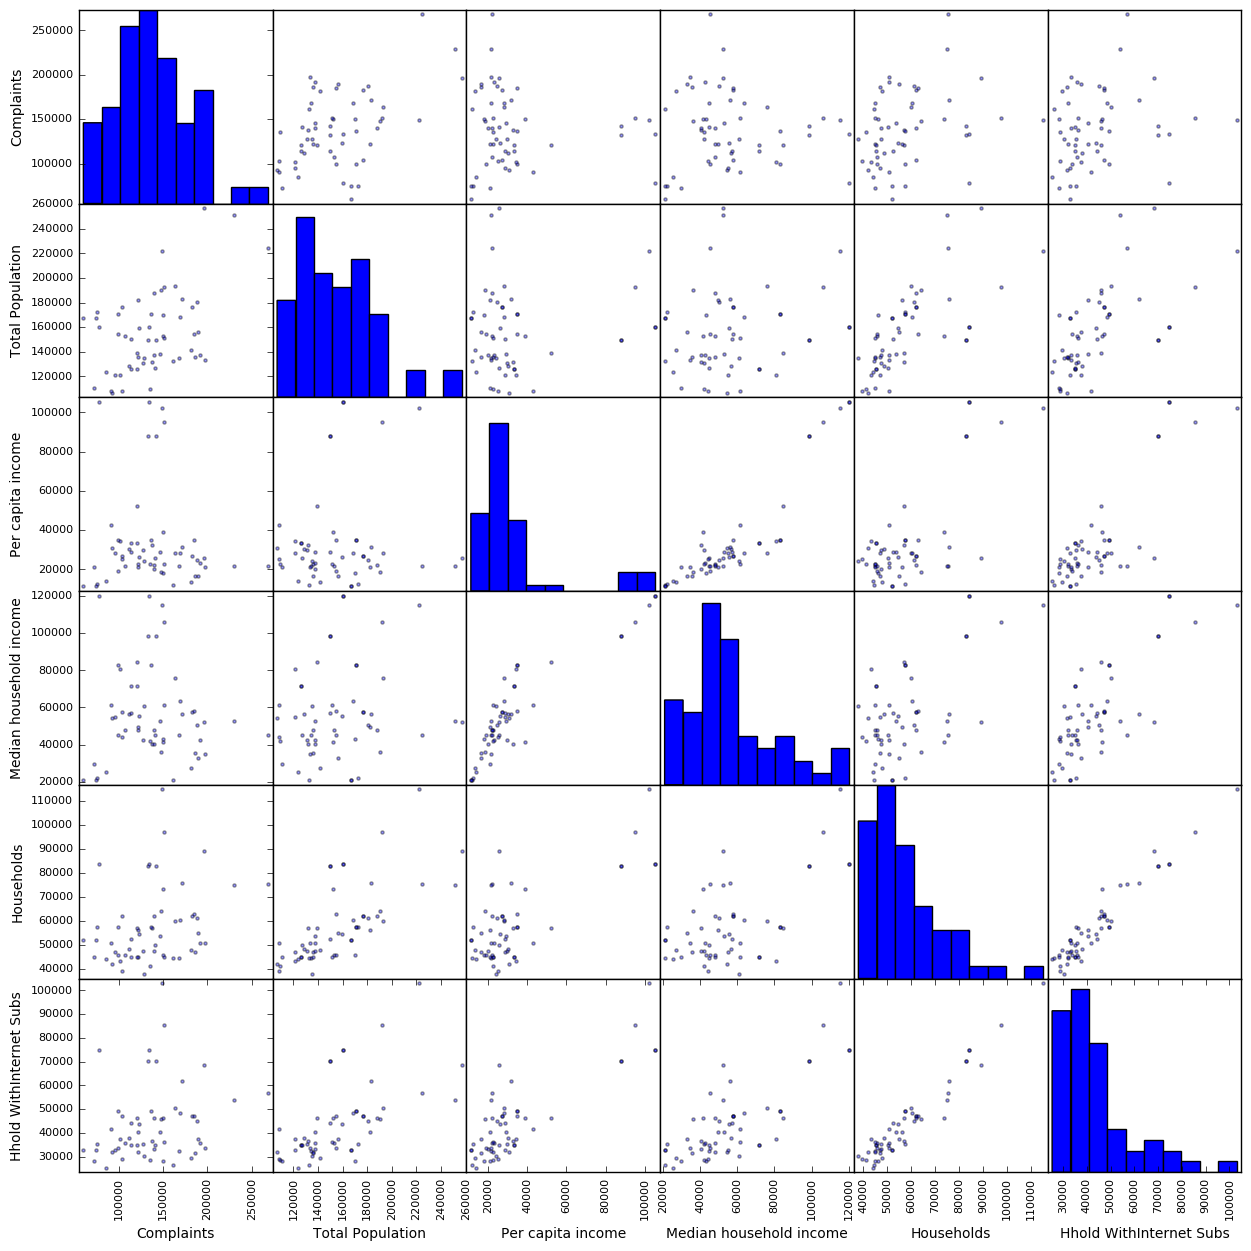

In [162]:
fig = pl.figure(figsize(15,15))
pd.scatter_matrix(finaldf[param], alpha=0.4)

pl.show()

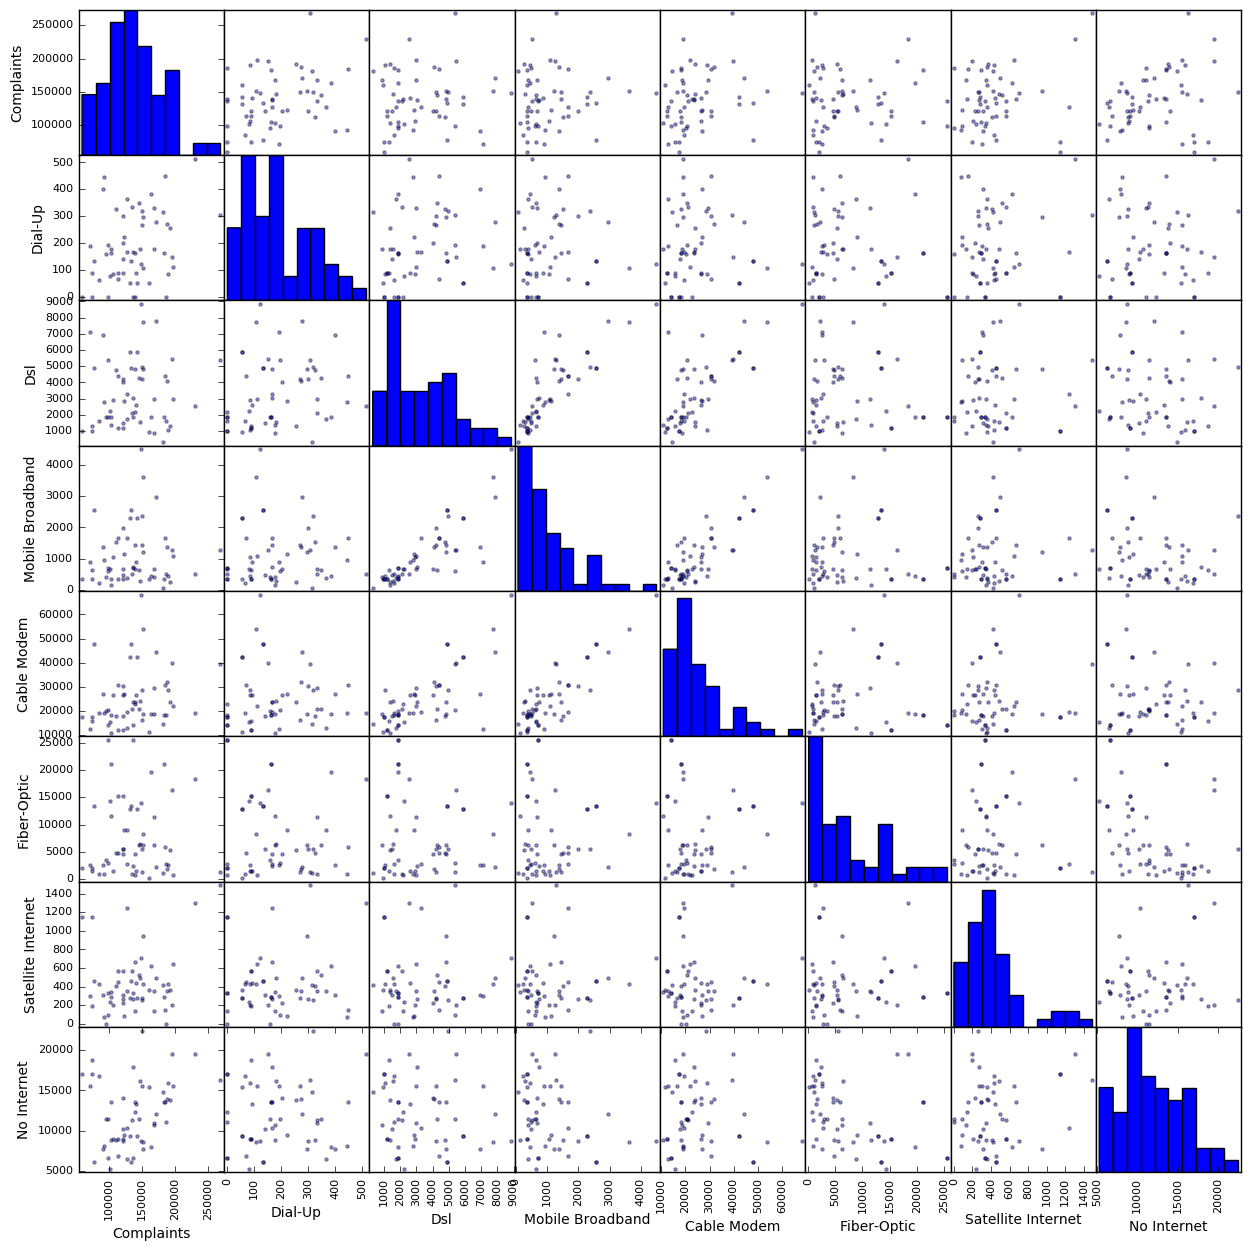

In [164]:
fig = pl.figure(figsize(15,15))
pd.scatter_matrix(finaldf[param2], alpha=0.4)

pl.show()

In [165]:
finaldf.corr(method='pearson', min_periods=1)

,Complaints,Total Population,Per capita income,% Male,Median household income,Households,Hhold WithInternet Subs,Dial-Up,Dsl,Mobile Broadband,Cable Modem,Fiber-Optic,Satellite Internet,No Internet
Complaints,1.000000,0.476912,-0.078677,-0.060376,-0.049148,0.300660,0.221682,0.327599,0.070244,0.069957,0.240767,0.032018,0.231021,0.294620
Total Population,0.476912,1.000000,0.128510,0.123991,0.183203,0.698051,0.613345,0.073736,0.278843,0.296242,0.454575,0.364955,0.358494,0.321171
Per capita income,-0.078677,0.128510,1.000000,0.041093,0.896541,0.731868,0.829379,-0.106840,0.579956,0.789479,0.769853,0.363687,-0.054437,-0.460354
% Male,-0.060376,0.123991,0.041093,1.000000,0.120531,0.020249,0.059752,-0.115383,0.164884,0.092418,0.009708,0.126018,0.010759,-0.157412
Median household income,-0.049148,0.183203,0.896541,0.120531,1.000000,0.610546,0.779219,-0.032373,0.474382,0.647898,0.615113,0.612369,-0.082778,-0.676470
Households,0.300660,0.698051,0.731868,0.020249,0.610546,1.000000,0.962021,-0.033367,0.631027,0.771660,0.874365,0.362405,0.161986,0.062918
Hhold WithInternet Subs,0.221682,0.613345,0.829379,0.059752,0.779219,0.962021,1.000000,-0.038552,0.657881,0.807900,0.886350,0.463343,0.119722,-0.206879
Dial-Up,0.327599,0.073736,-0.106840,-0.115383,-0.032373,-0.033367,-0.038552,1.000000,0.202962,0.023499,-0.016072,-0.097404,0.093884,0.060907
Dsl,0.070244,0.278843,0.579956,0.164884,0.474382,0.631027,0.657881,0.202962,1.000000,0.838067,0.727361,-0.037661,0.033305,-0.130394
Mobile Broadband,0.069957,0.296242,0.789479,0.092418,0.647898,0.771660,0.807900,0.023499,0.838067,1.000000,0.864486,0.048495,0.057223,-0.226905


#### when th population grows in a Community Distric the complains do as well, and this shows people with an Internet subscription complain more to 311

In [ ]:
# Link the 3 dataframes

In [ ]:
# Are the demographics and infrastructure different in Community Districts that show more complaints than others?